In [2]:
%matplotlib inline

from neptune.sessions import Session
from neptunecontrib.api.utils import extract_project_progress_info
from neptunecontrib.viz.projects import project_progress

PROJECT_NAME = 'neptune-ml/credit-default-prediction'
PROJECT_METRIC = 'valid_auc'

session = Session()
project = session.get_project(PROJECT_NAME)
leadearboard = project.get_leaderboard()

# Project progress

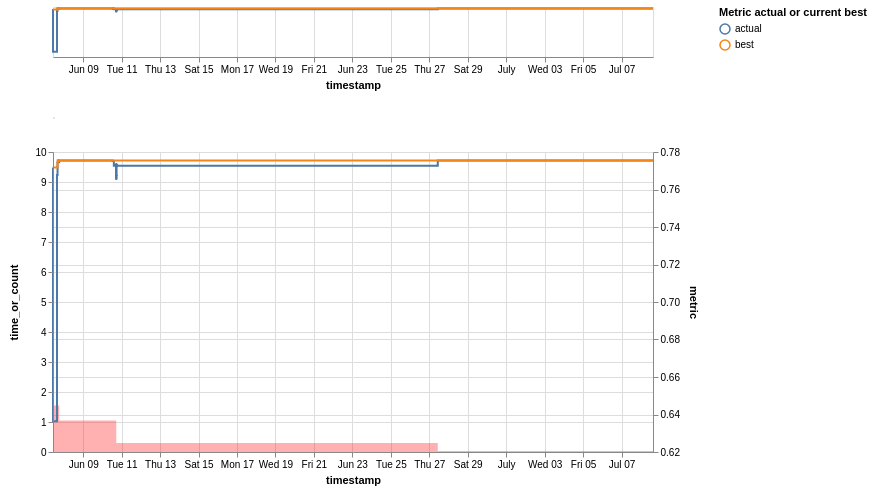

In [3]:
progress_df = extract_project_progress_info(leadearboard,
                                            metric_colname='channel_{}'.format(PROJECT_METRIC),
                                            time_colname='finished')

project_progress(progress_df, width=600, heights=[50, 300])

# Experiments by person

In [4]:
leadearboard[PROJECT_METRIC] = leadearboard['channel_{}'.format(PROJECT_METRIC)].astype(float)
person_stats = leadearboard.groupby('owner')['finished','running_time',PROJECT_METRIC].\
agg({'finished':'count','running_time':'sum',PROJECT_METRIC:'max'}).reset_index()
person_stats['running_time_hours'] = person_stats['running_time']/3600
person_stats

,owner,finished,running_time,valid_auc,running_time_hours
0,jakub-czakon,25,10837,0.775489,3.010278
1,kamil,4,136,0.773536,0.037778
